# Tutorial 11: Operations on fields

In this tutorial, we show some basic operations that can be performed on fields in Ubermag. Fot that, we are going to use a skyrmion example.

Running OOMMF (ExeOOMMFRunner) [2020/05/04 11:54]... (1.6 s)


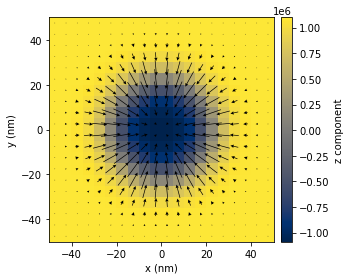

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm

%matplotlib inline

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), pbc='xy')

system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.2e6, u=(0, 0, 1)) 
               + mm.Zeeman(H=(0, 0, 1e5)))

def m_init(pos):
    """Function to set initial magnetisation direction: 
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.
    
    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    

system.m = df.Field(mesh, dim=3, value=m_init, norm=1.1e6)

# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

The magnetisation field is in `system.m`.

To access a numpy array of a magnetisation field:

In [2]:
system.m.array

array([[[[   1577.02185283,    1577.02185283, 1099997.73909047],
         [   1577.02185283,    1577.02185283, 1099997.73909047]],

        [[   2131.76347421,    4844.39139977, 1099987.26695197],
         [   2131.76347421,    4844.39139977, 1099987.26695197]],

        [[   3355.14447758,    8389.23388935, 1099962.8919924 ],
         [   3355.14447758,    8389.23388935, 1099962.8919924 ]],

        ...,

        [[   3355.14447758,   -8389.23388935, 1099962.8919924 ],
         [   3355.14447758,   -8389.23388935, 1099962.8919924 ]],

        [[   2131.76347421,   -4844.39139977, 1099987.26695197],
         [   2131.76347421,   -4844.39139977, 1099987.26695197]],

        [[   1577.02185283,   -1577.02185283, 1099997.73909047],
         [   1577.02185283,   -1577.02185283, 1099997.73909047]]],


       [[[   4844.39139977,    2131.76347421, 1099987.26695197],
         [   4844.39139977,    2131.76347421, 1099987.26695197]],

        [[   6624.80395466,    6624.80395466, 1099960.101069

This exposes the field to numpy and all operations present in numpy can be used. However, there are several convenience functions which are a part of the `Field` object.

To get an individual component:

In [3]:
system.m.x

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), pbc={'x', 'y'}, subregions={}), dim=1)

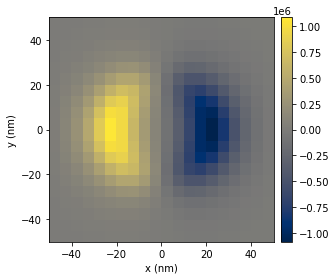

In [4]:
system.m.x.plane('z').mpl()

In [5]:
system.m.y

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), pbc={'x', 'y'}, subregions={}), dim=1)

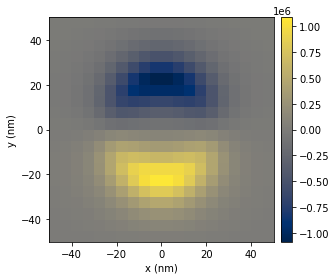

In [6]:
system.m.y.plane('z').mpl()

In [7]:
system.m.z

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), pbc={'x', 'y'}, subregions={}), dim=1)

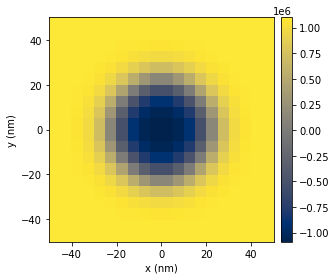

In [8]:
system.m.z.plane('z').mpl()

The magnetisation is by default not normalised.

In [9]:
system.m.average

(8.851088750816416e-12, 8.783445082372055e-12, 750239.3999862953)

To get normalised magnetisation:

In [10]:
system.m.orientation

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), pbc={'x', 'y'}, subregions={}), dim=3)

In [11]:
system.m.orientation.average

(9.815282267511272e-18, 7.784571598445922e-18, 0.6820358181693598)

### Basic operations

Let us define two fields:

In [12]:
region = df.Region(p1=(0, 0, 0), p2=(10e-9, 10e-9, 10e-9))
mesh = df.Mesh(region=region, n=(10, 10, 10))

f1 = df.Field(mesh, dim=3, value=(1, 1, 0))
f2 = df.Field(mesh, dim=3, value=(2, 1, 3))

In [13]:
f1.average

(1.0, 1.0, 0.0)

In [14]:
f2.average

(2.0, 1.0, 3.0)

`+` operation

In [15]:
f1 + f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=3)

In [16]:
(f1 + f2).average

(3.0, 2.0, 3.0)

`-` operation

In [17]:
f1 - f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=3)

In [18]:
(f1 - f2).average

(-1.0, 0.0, -3.0)

`*` operation

In [19]:
# NBVAL_SKIP
f1 * f2  # both are vector fields

ValueError: Cannot multiply dim=3 and dim=3 fields.

In [20]:
f1.x * f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=3)

In [21]:
f1.x * f2.y

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=1)

`/` operation

In [22]:
# NBVAL_SKIP
f1 / f2  # both are vector fields

ValueError: Cannot apply ** operator on dim=3 field.

In [23]:
f1 / f2.x

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=3)

In [24]:
# NBVAL_SKIP
f2.x / f1

ValueError: Cannot apply ** operator on dim=3 field.

Vector products

In [25]:
f1 @ f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=1)

In [26]:
df.cross(f1, f2)

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=3)

`**` operator

In [27]:
# NBVAL_SKIP
f1 ** 2

ValueError: Cannot apply ** operator on dim=3 field.

In [28]:
f1.x ** 2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=1)

Compund operations

In [29]:
f1 += f2

In [30]:
f1 -= f2

In [31]:
f1 *= f2.x

In [32]:
f2 /= f2.y

Differential operators

In [33]:
f1.dim

3

In [34]:
f1.x.grad

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=3)

In [35]:
f1.div

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=1)

In [36]:
f1.curl

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), pbc=set(), subregions={}), dim=3)

Integration over the volume

In [37]:
f1.integral

(2.0000000000000002e-24, 2.0000000000000002e-24, 0.0)

In [38]:
f1.average

(2.0, 2.0, 0.0)

In [39]:
(f1 / mesh.region.volume).integral

(1.9999999999999638, 1.9999999999999638, 0.0)

Operation pipelines

In [40]:
f1.x.grad.div.grad.curl.y.grad.integral

(0.0, 0.0, 0.0)

**Exercise 1**

Implement skyrmion number function and apply it on `system.m`.

$$S = \frac{1}{4\pi} \int \mathbf{m} \cdot \left(\frac{\partial \mathbf{m}}{\partial x} \times \frac{\partial \mathbf{m}}{\partial y}\right) dxdy$$

**Solution**

In [41]:
import numpy as np

m = system.m.orientation.plane('z')

dmdx = m.derivative('x')
dmdy = m.derivative('y')

q = m @ df.cross(dmdx, dmdy)

S = q.integral / (4*np.pi)

# .integral is an integral over the volume

S = S / m.mesh.cell[2]

S

-0.9244762913457668

Or using Ubermag function:

In [42]:
m.topological_charge()

-0.9244762913457669

Using Berg-Luescher method

In [43]:
m.topological_charge(method='berg-luescher')

-0.999745566485005